In [1]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read the dataset

In [2]:
#Loading the dataset
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# check for null values

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
# check for duplicated values

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

# Insights

* The Advertising dataset consists of Sales of TV, Radio and Newspaper.
* There are 200 rows and 5 columns provided in the data.
* No duplicate values exist in the dataset.
* Null values not exist in the dataset.

In [9]:
# Descriptive Statistics Analysis

In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# Deleting Unnamed column as it is not needed
df.drop(columns = "Unnamed: 0", inplace = True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Correlation Heatmap

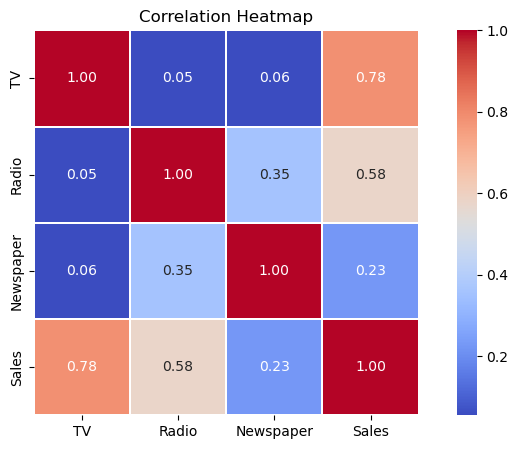

In [12]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()
     

# Insights
From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly positively correlated.

# Chart -2

<Figure size 1000x600 with 0 Axes>

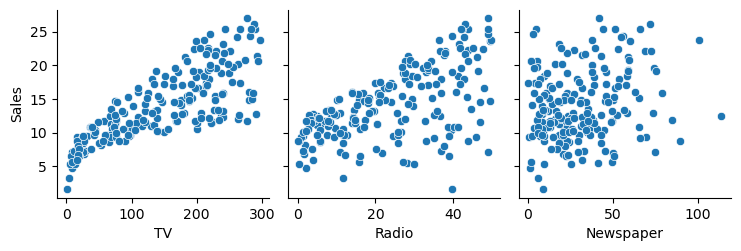

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales')
plt.show()

Sales exhibits a stronger correlation with TV advertising compared to Radio and Newspaper, implying a more pronounced influence of TV advertising on Sales.Outliers are present in Newspaper vs Sales pairplot

In [14]:
# Defining dependent variable
dependent_variable = ['Sales']

###### Checking if the dependent variable is skewed or not

In [15]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.407571
dtype: float64

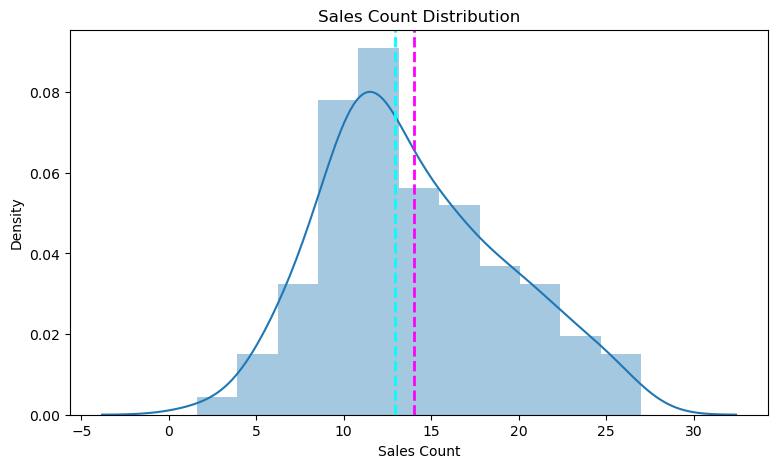

In [16]:
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

Ploted distribution plot and checked for the skewness, found that the data is normally distributed and the skewness value is also very well, so it didn't needs any transformation.

In [17]:
# Defining dependent and independent variables
X= np.array(df.drop('Sales', axis=1))
y= np.array(df['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


# Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Data Scaling

In [19]:
scaler = StandardScaler()

X_train_s= scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Sales Prediction

I will be using the following models:

* Linear Regression
* Random Forest Regressor

In [20]:
# Linear Regression

In [21]:
model=LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [22]:
#Fitting the model
y_pred = model.predict(X_test_s)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
y_train_pred = model.predict(X_train_s)  # Predict the target variable for the training set
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_pred)

In [23]:
# Printing Evaluation Matrix
print("MSE :" , mse)
print("RMSE :" ,rmse)

print("Train R2 :" ,r2_train)
print("Test R2 :" ,r2_test)

MSE : 3.1740973539761064
RMSE : 1.7815996615334508
Train R2 : 0.8957008271017817
Test R2 : 0.8994380241009119


In [24]:
linr = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
linr.head()

,actual,predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


Text(0.5, 1.0, 'Actual and Predicted Sales')

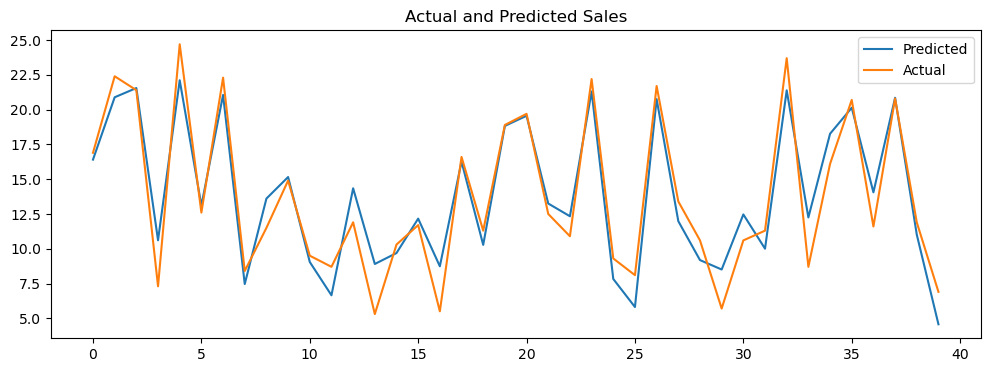

In [25]:
# plot actual and predicted values
plt.figure(figsize=(12,4))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

# Random Forest Regressor

In [26]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [27]:
forest_pred = random_forest.predict(X_test_s)
mse_rf = mean_squared_error(y_test, forest_pred)
rmse_rf = np.sqrt(mse_rf)
y_train_pred_rf = model.predict(X_train_s)  # Predict the target variable for the training set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test,forest_pred)

In [28]:
# Printing Evaluation Matrix
print("MSE RF :" , mse_rf)
print("RMSE RF :" ,rmse_rf)

print("Train R2 RF :" ,r2_train_rf)
print("Test R2 RF :" ,r2_test_rf)

MSE RF : 0.6075692000000009
RMSE RF : 0.779467253962603
Train R2 RF : 0.8957008271017817
Test R2 RF : 0.9807509498185706


In [29]:
data_frame = pd.DataFrame({'actual': y_test.flatten(), 'predicted': forest_pred.flatten()})
data_frame.head()

,actual,predicted
0,16.9,17.743
1,22.4,21.600
2,21.4,20.775
3,7.3,6.756
4,24.7,23.076


Text(0.5, 1.0, 'Actual and Predicted Sales')

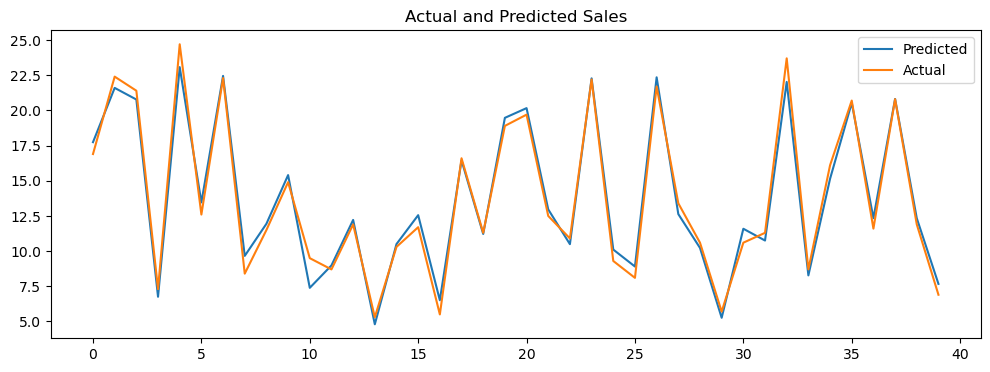

In [30]:
# plot actual and predicted values
plt.figure(figsize=(12,4))
plt.plot((forest_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

The Orange shows the distribution count for actual values and the Blue line shows the distribution count for predicted values. The predicted values are close to the actual values and almost coincides with the actual values. This shows that the model is a good fit.

# Conclusion

I have used regressor models - Linear Regression model and Random Forest Regressor for predicting the sales.
The Random Forest Regressor has performed well with the accuracy of 98%